## Рябцев Максим , 381908-4
## 27.Методы разделимых наименьших квадратов. Квантовые дефекты.

Используя метод разделимых наименьших квадратов, построим модель вида:
$$ y=\beta_{1} - \beta_{2}x - \frac{arctan(\frac{\beta_{3}}{x-\beta4})}{\pi} $$

Предиктор x – возбужденное состояние энергии, переменная отклика y – число квантовых дефектов.

In [25]:
#Подключаю библиотеки
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

In [52]:
#Задаю аппроксимирующую функцию
def func(x, b1, b2, b3, b4):
    return b1 - b2 * x - (np.arctan(b3/(x - b4))/math.pi)

In [41]:
#Задаю твои начальные данные
xdata = np.array([-4868.68,-4868.09,-4867.41,-3375.19,-3373.14,-3372.03,-2473.74,-2472.35,-2469.45,-1894.65,-1893.40,-1497.24,-1495.85,-1493.41,-1208.68,-1206.18,-1206.4,-997.92,-996.61,-996.31,-834.94,-834.66,-710.03,-530.16,-464.17])
ydata = np.array([0.252429,0.252141,0.251809,0.297989,0.296257,0.295319,0.339603,0.337731,0.333820,0.389510,0.386996,0.438864,0.434887,0.427893,0.471568,0.461699,0.461144,0.513532,0.506641,0.505062,0.535648,0.533726,0.568064,0.612886,0.624169])

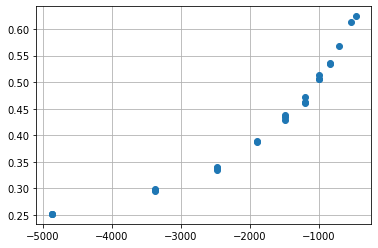

In [42]:
plt.plot(xdata,ydata, 'o')
plt.grid()

In [53]:
#кёрв фит возвращает два массива, поэтому присваивать надо двум переменным, первая-неизвестные коэффициенты а, б, с, вторая- неважно, не используется
popt, pcov = curve_fit(func, xdata, ydata)

In [44]:
res, _ = optimize.curve_fit(funct,x,y)
B3, B4 = res[2], res[3]
B3, B4

(1204.646158967508, -181.4374606566056)

In [55]:
def fun(xdata,B3,B4):
    return (np.arctan(B3/(xdata - B4))/math.pi)
C = fun(xdata, B3, B4)
Y = ydata + C

In [56]:
X = xdata * -1
B2, B1 = np.polyfit(X, Y, 1)
B2, B1

(-6.189709773259743e-06, 0.2019281510599386)

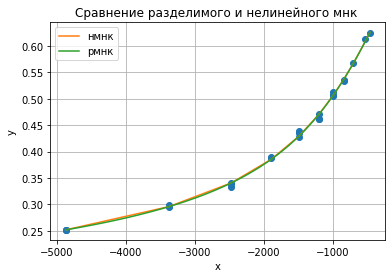

In [70]:
XX = np.linspace(np.min(xdata), np.max(xdata), 100)
YY = B1 - B2 * XX - (np.arctan(B3/(XX - B4))/math.pi)
plt.plot(xdata,ydata, 'o')
plt.title('Сравнение разделимого и нелинейного мнк ')
plt.plot(xdata, func(xdata, *popt), label='нмнк')
plt.plot(XX,YY, label='рмнк')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

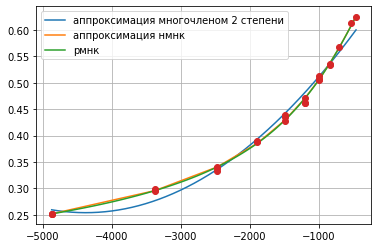

In [69]:
#Для аппроксимации полиномом второй степени использую функцию полифит и запихиваю коэффициенты в поли1д
from numpy import polyfit, poly1d

coefficients = polyfit( xdata, ydata, 2 ) 
p = poly1d( coefficients ) 
x = np.arange(-4868.68,-464.17,0.1) 
plt.plot( x, p(x), label='аппроксимация многочленом 2 степени') 
plt.plot(xdata, func(xdata, *popt), label='аппроксимация нмнк')
plt.plot(XX,YY, label='рмнк')
plt.plot(xdata,ydata, 'o')
plt.grid()
plt.legend()

In [63]:
print(np.sqrt(np.sum((func(xdata, B1, B2, B3, B4) - ydata)**2)/len(xdata)))
print(np.sqrt(np.sum((func(xdata, *popt) - ydata)**2)/len(xdata)))
print(np.sqrt(np.sum((func(xdata, B1, B2, B3, B4) - ydata)**2)/len(xdata))-np.sqrt(np.sum((func(xdata, *popt) - ydata)**2)/len(xdata)))

0.004444391822854449
0.004444391822854456
-6.938893903907228e-18


In [68]:
print(np.sqrt(np.sum((coefficients[2] + coefficients[1] * xdata + coefficients[0]*(xdata**2) - ydata)**2)/len(xdata)))
print(np.sqrt(np.sum((func(xdata, B1, B2, B3, B4) - ydata)**2)/len(xdata)))

0.012524259909723312
0.004444391822854449


# Вывод:
## Как можно увидеть разность ошибок аппроксимации разделимым и нелинейным мнк примерно равна -7е-18 и расхождения у них начинаются примерно с 14 знака, что показывает, что они примерно одинаково точны, но рмнк с точностью до 14 знака точнее. Сравнение рмнк с полиномом второй степени показывает, что рмнк на порядок точнее, что отдаёт ему явное преимущество в задачах аппроксимации подобных модельных функций.